In [5]:
"""
Created on Fri Mar  3 21:47:52 2023
@author: Chenfeng Chen
"""

import plotly.graph_objects as go
import pandas as pd
import numpy as np

def moving_section(x, n_min, n_max):
    result = []
    for i in np.arange(n_max, len(x), 1):
        section = x[i-n_max:i-n_min+1]
        result.append(section)
    return result

df = pd.read_csv(
    'https://raw.githubusercontent.com/wooii/cn_births/main/data.csv'
    )
df["label"] = df["notes"].isnull()

# 假设生育妇女年龄为15 - 49。
birth_ages = np.arange(15, 50)
# 生育人数。
birth_groups = moving_section(x=df["births"], n_min=15, n_max=49)
weighted_birth_population = np.append([np.nan]*(len(df)-len(birth_groups)),
                                      [i.sum() for i in birth_groups])
# Adjust birth rate by male:female ratio 1.06:1.
df["birth_rates"]= df["births"]/(weighted_birth_population*100/206)

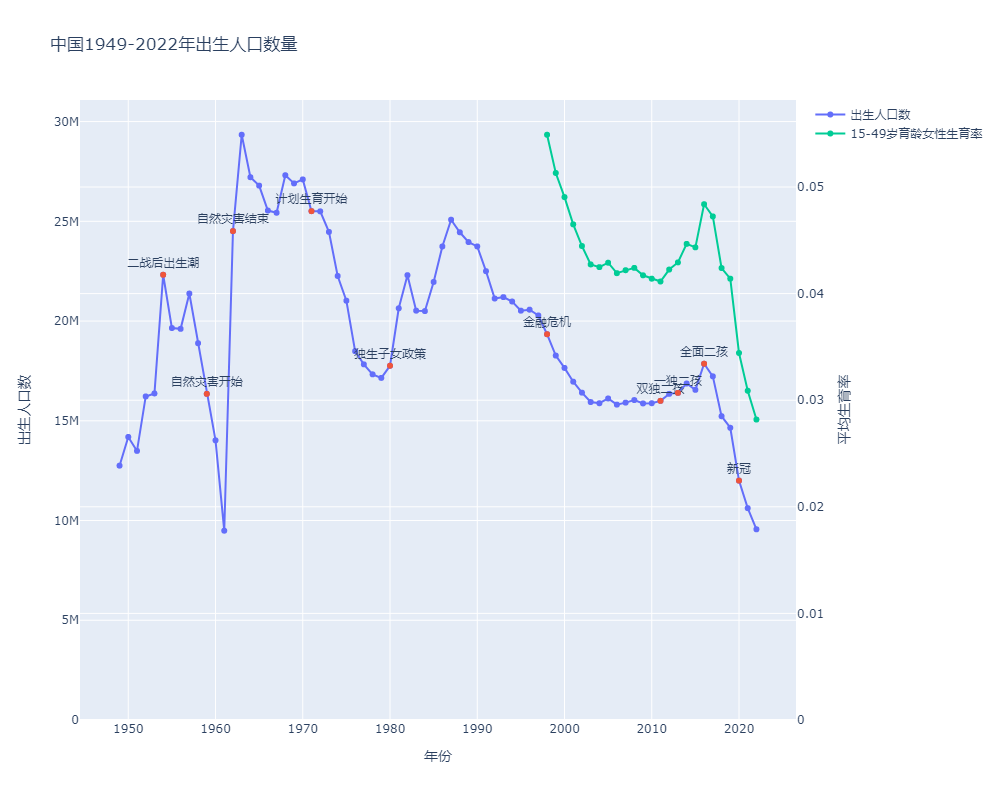

In [6]:
# Plot.
trace1 = go.Scatter(
    x=df["year"],
    y=df["births"],
    mode='lines+markers+text',
    text=df["notes"],
    textposition='top center',
    name='出生人口数',
    yaxis='y1'
)

trace2 = go.Scatter(
    x=df["year"][df["label"]==False],
    y=df["births"][df["label"]==False],
    mode='markers',
    yaxis='y1',
    showlegend=False
)

trace3 = go.Scatter(
    x=df["year"],
    y=df["birth_rates"],
    mode='lines+markers',
    name='15-49岁育龄女性生育率',
    yaxis='y2'
)

# Create the layout with two y-axes.
layout = go.Layout(
    title='中国1949-2022年出生人口数量', 
    xaxis_title='年份',
    width=1000, 
    height=800,
    yaxis=dict(
        title='出生人口数',
        rangemode="tozero"
    ),
    yaxis2=dict(
        title='平均生育率',
        overlaying='y',
        side='right',
        rangemode="tozero"
    )
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show("png")